In [1]:
import pandas as pd

# Load the data
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Look at the first few rows
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [2]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [3]:
customers = customers.drop_duplicates()
products = products.drop_duplicates()
transactions = transactions.drop_duplicates()


In [4]:
print(customers.info())
print(products.info())
print(transactions.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 7.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [5]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])


In [6]:
print(customers.shape)  # Number of customers
print(products.shape)  # Number of products
print(transactions.shape)  # Number of transactions


(200, 4)
(100, 4)
(1000, 7)


In [12]:
# Merge Transactions and Products to include Product Names
merged_data = transactions.merge(products, on="ProductID")

# Group by ProductID and ProductName to find total quantity sold
top_products = (
    merged_data.groupby(["ProductID", "ProductName"])["Quantity"]
    .sum()
    .sort_values(ascending=False)
)

# Display the top 5 products
print("Top - 5 products: ")
print(top_products.head(5))

print("Least sold products: ")
print(top_products.tail(5))


Top - 5 products: 
ProductID  ProductName        
P059       SoundWave Jeans        46
P054       SoundWave Cookbook     46
P029       TechPro Headphones     45
P079       ActiveWear Rug         43
P061       HomeSense Desk Lamp    43
Name: Quantity, dtype: int64
Least sold products: 
ProductID  ProductName             
P044       ActiveWear Running Shoes    13
P060       HomeSense T-Shirt           13
P024       SoundWave Cookbook          12
P099       SoundWave Mystery Book      11
P031       SoundWave Headphones         9
Name: Quantity, dtype: int64


In [8]:
region_counts = customers['Region'].value_counts()
print(region_counts)


South America    59
Europe           50
North America    46
Asia             45
Name: Region, dtype: int64


<AxesSubplot:title={'center':'Total Sales Over Time'}, xlabel='TransactionDate'>

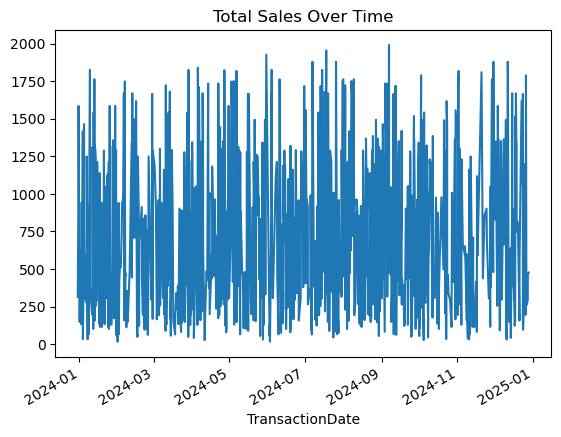

In [9]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
sales_over_time = transactions.groupby('TransactionDate')['TotalValue'].sum()
sales_over_time.plot(title="Total Sales Over Time", kind="line")


In [10]:
merged = transactions.merge(products, on="ProductID")
category_sales = merged.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print(category_sales)


Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


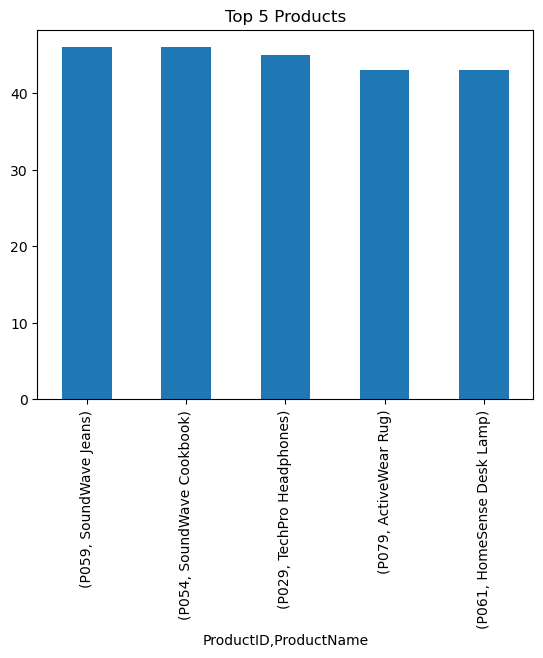

In [13]:
import matplotlib.pyplot as plt

top_products.head(5).plot(kind='bar', title="Top 5 Products")
plt.show()


In [ ]:
# Data insights : 
# (1) Mostly the products which were sold is with product_id=P059, whose name 
# is SoundWave Jeans and the quantity sold is 46.
# (2) Least sold product is with product_id=P031,with name SoundWave Headphones and quantity sold=9.
# (3) Our most customers lies in the South America.
# (4) Most of the transaction happening in the September(9-24).
# (5) The category of the entity which sold for highest value is Books with 192147.47.